In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scikits.odes.ode import ode

In [2]:
#Instantiate functions to compute activation and repression
def activation(x, k, theta, n):
    return (k*(x/theta)**n)/(1+(x/theta)**n)

def repression(x, k, theta, n):
    return k/(1+(x/theta)**n)

def nonlinearity(x, kc, km):
    return (kc*x)/(km+x)

In [3]:
#OLD CODE TRYING TO AUTOCOMPLETE SYSTEM OF DES
# #Establish stoichiometric matrix
# S = np.array([[-1, 0], [1, -1]])
# #Establish input matrix
# I = np.zeros(X)
# I[0] = Vin
# #Specify which Xs can act as transcription factors
# T = 1
# W = W[T] #Filter W so only fitting parameters of possible transcriptional controls
# V = V[T]
# #Establish system of differential equations
# y = np.array([2290.,0.,1.,0.])
# ydot = []
# #Kinetic equations
# for i in range(X):
#     ydot = I[i] - lam*y[i] + S*nonlinearity(y[X:], kc, km)
# j = 0
# for i in range(X,X+E):
#     ydot = -lam*y[i] + repression(y[T], W[j, 0], W[j, 1], W[j, 2]) + activation(y[T], V[j, 0], V[j, 1], V[j, 2])
#     j += 1
# #Add J1, J2
# ydot = (I[0] + S*nonlinearity(y[1], kc, km))**2

In [4]:
#Specify model parameters 
X = 2 #Number of xs in model
E = 2 #Number of enzymes in model

#Initialize weights
W = np.random.normal(0, 0.1, [E, 3]) #K, theta, n are 3 dimensions
V = np.random.normal(0, 0.1, [E, 3]) #same but for activation
t = np.linspace(0, 5e4, 101)

#Constants
Vin = 1
e0 = 0.0467 
lam = 1.93E-4 #1/s
#Assume equal kinetics for all three enzymes - CHANGE THIS LATER
kc = 12 #1/s
km = 10 


In [5]:
def model(t, y, ydot):
    """ Manually creates toy DE model with control at X1 site"""
    ydot[0] = Vin - lam*y[0] - e0*nonlinearity(y[0], kc, km) - y[2]*nonlinearity(y[0], kc, km) 
    ydot[1] = y[2]*nonlinearity(y[0], kc, km) - y[3]*nonlinearity(y[1], kc, km) - lam*y[1]
    ydot[2] = activation(y[1], V[0, 0], V[0, 1], V[0, 2]) + repression(y[1], W[0, 0], W[0, 1], W[0, 2]) - lam*y[2]
    ydot[3] = activation(y[1], V[1, 0], V[1, 1], V[1, 2]) + repression(y[1], W[1, 0], W[1, 1], W[1, 2]) - lam*y[3]
    ydot[4] = (Vin -  y[3]*nonlinearity(y[1], kc, km))**2
    ydot[5] = activation(y[1], V[:, 0], V[:, 1], V[:, 2]).sum() + repression(y[1], W[:, 0], W[:, 1], W[:, 2]).sum()

In [6]:
def upstream_repression(t, y, ydot):
    """ we create rhs equations for the problem"""
    ydot[0] = Vin - lam*y[0] - e0*nonlinearity(y[0], kc, km) - lam*y[1]
    ydot[1] = y[2]*nonlinearity(y[0], kc, km) - y[3]*nonlinearity(y[1], kc, km) - lam*y[1]
    ydot[2] = repression(y[1], W[0, 0], W[0, 1], W[0, 2]) - lam*y[2]
    ydot[3] = W[1, 0] - lam*y[3]
    ydot[4] = (Vin -  y[3]*nonlinearity(y[1], kc, km))**2
    ydot[5] = repression(y[1], W[0, 0], W[0, 1], W[0, 2])
    

In [38]:
W = np.array([[0.0001, 1, 2], [0.00020, 1, 0]])
repression(1, W[1, 0], W[1, 1], W[1, 2])

0.0001

<Figure size 432x288 with 0 Axes>

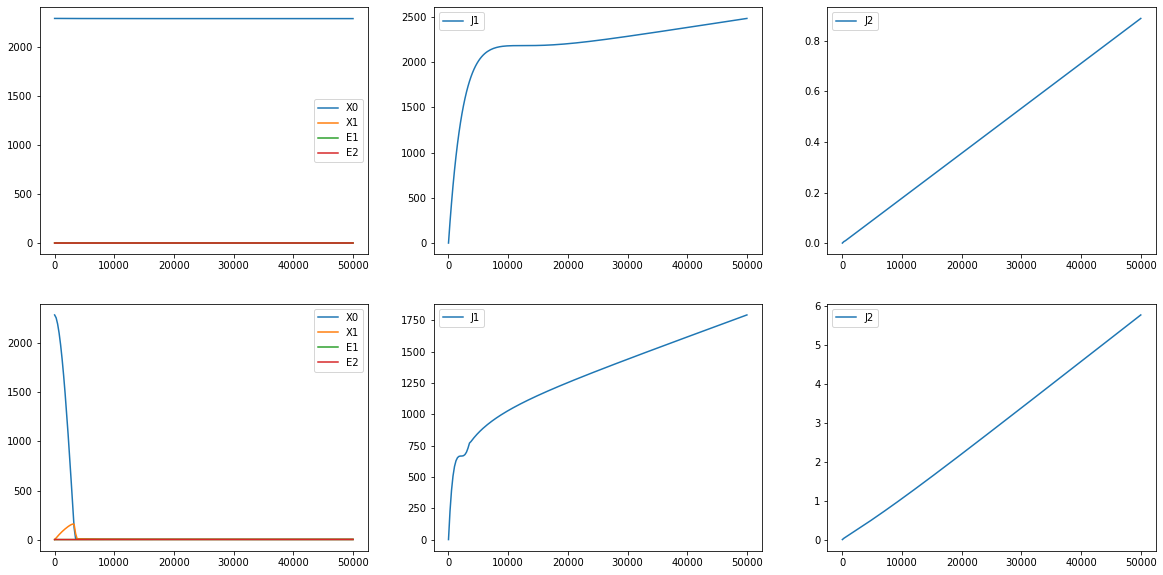

In [41]:
#Single parameter point solution - comparing upstream repression with model
t = np.linspace(1,5e4,200)
y0 = np.array([2290., 0., 0., 0., 0., 0.])  # initial condition
W = np.array([[0.0001, 1, 2], [0.0001, 1, 2]])
V = np.array([[0.0001, 1, 0], [0.0001, 1, 0]]) #Activation turned off
solution = ode('cvode', upstream_repression, old_api=False).solve(t, y0)
solution2 = ode('cvode', model, old_api=False).solve(t, y0)

fig = plt.figure()
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

axs[0, 0].plot(solution.values.t, solution.values.y[:,0], label='X0')
axs[0, 0].plot(solution.values.t, solution.values.y[:,1], label='X1')
axs[0, 0].plot(solution. values.t, solution.values.y[:,2], label='E1')
axs[0, 0].plot(solution.values.t, solution.values.y[:,3], label='E2')
axs[0, 1].plot(solution.values.t, solution.values.y[:, 4], label='J1')
axs[0, 2].plot(solution.values.t, solution.values.y[:, 5], label='J2')
axs[0, 0].legend()
axs[0, 1].legend()
axs[0, 2].legend()

axs[1, 0].plot(solution2.values.t, solution2.values.y[:,0], label='X0')
axs[1, 0].plot(solution2.values.t, solution2.values.y[:,1], label='X1')
axs[1, 0].plot(solution2.values.t, solution2.values.y[:,2], label='E1')
axs[1, 0].plot(solution2.values.t, solution2.values.y[:,3], label='E2')
axs[1, 1].plot(solution2.values.t, solution2.values.y[:, 4], label='J1')
axs[1, 2].plot(solution2.values.t, solution2.values.y[:, 5], label='J2')
axs[1, 0].legend()
axs[1, 1].legend()
axs[1, 2].legend()


plt.show()